<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/ml_python.png' width=600/></center>

<img src = "https://github.com/Jangrae/img/blob/master/carseats.png?raw=true" width=800 align="left"/>

# 실습 내용

- Carseats 데이터에 대해 모델링합니다.
- 다중 선형회귀 모델을 만들고 평가합니다.
- 특히 회귀 계수를 명확히 이해합니다.
- 예측 결과를 시각화합니다.

# 1.환경 준비

- 기본 라이브러리와 대상 데이터를 가져와 이후 과정을 준비합니다.

In [19]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format='retina'

In [20]:
# 데이터 읽어오기
path = 'https://raw.githubusercontent.com/Jangrae/csv/master/Carseats.csv'
data = pd.read_csv(path)

# 2.데이터 이해

- 분석할 데이터를 충분히 이해할 수 있도록 다양한 탐색 과정을 수행합니다.

In [21]:
# 상위 몇 개 행 확인
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


**데이터 설명**

- Sales: 각 지역 판매량(단위: 1,000개)
- CompPrice: 경쟁사 가격 (단위: 달러)
- Income: 지역 평균 소득 (단위: 1,000달러)
- Advertising: 각 지역, 회사의 광고 예산 (단위: 1,000달러)
- Population: 지역 인구 수 (단위: 1,000명)
- Price: 자사 지역별 판매 가격 (단위: 달러)
- ShelveLoc: 진열 상태
- Age: 지역 인구의 평균 연령
- Education: 각 지역 교육 수준
- Urban: 도심 지역 여부 (Yes,No)
- US: 매장이 미국에 있는지 여부 (Yes, No)

In [22]:
# 기술통계 확인
data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [23]:
# NaN 값 확인
data.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [24]:
# 상관관계 확인
data.corr()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,-0.231815,-0.051955
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,-0.100239,0.025197
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.004670,-0.056855
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,-0.004557,-0.033594
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.042663,-0.106378
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,-0.102177,0.011747
Age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,1.000000,0.006488
Education,-0.051955,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.006488,1.000000


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [26]:
cols = data.select_dtypes('O').columns.values

In [30]:
data = pd.get_dummies(data)

# 3.데이터 준비

- 전처리 과정을 통해 머신러닝 알고리즘에 사용할 수 있는 형태의 데이터를 준비합니다.

**1) x, y 분리**

In [31]:
# target 확인
target = 'Sales'

# 데이터 분리
x = data.drop(target, axis=1)
y = data[target]

**2) 가변수화**

In [ ]:
# 가변수화 대상: ShelveLoc, Education, Urban, US
dumm_cols = ['ShelveLoc', 'Education', 'Urban', 'US']

# 가변수화


# 확인
x.head()

**3) 학습용, 평가용 데이터 분리**

In [32]:
# 모듈 불러오기
# 데이터 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y)

# 4.모델링

- 본격적으로 모델을 선언하고 학습하고 평가하는 과정을 진행합니다.

In [33]:
# 1단계: 불러오기

from sklearn.linear_model import LinearRegression

In [34]:
# 2단계: 선언하기
model = LinearRegression()

In [35]:
# 3단계: 학습하기
model.fit(X_train, y_train)

LinearRegression()

In [52]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['feature'] = x.columns
vif['vif_factor'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif.sort_values('vif_factor', ascending=False, inplace=True)
vif.reset_index(drop=True, inplace=True)
vif

,feature,vif_factor
0,ShelveLoc_Bad,inf
1,ShelveLoc_Good,inf
2,ShelveLoc_Medium,inf
3,Urban_No,inf
4,Urban_Yes,inf
5,US_No,inf
6,US_Yes,inf
7,Advertising,2.103136
8,CompPrice,1.554618
9,Price,1.537068


<BarContainer object of 14 artists>

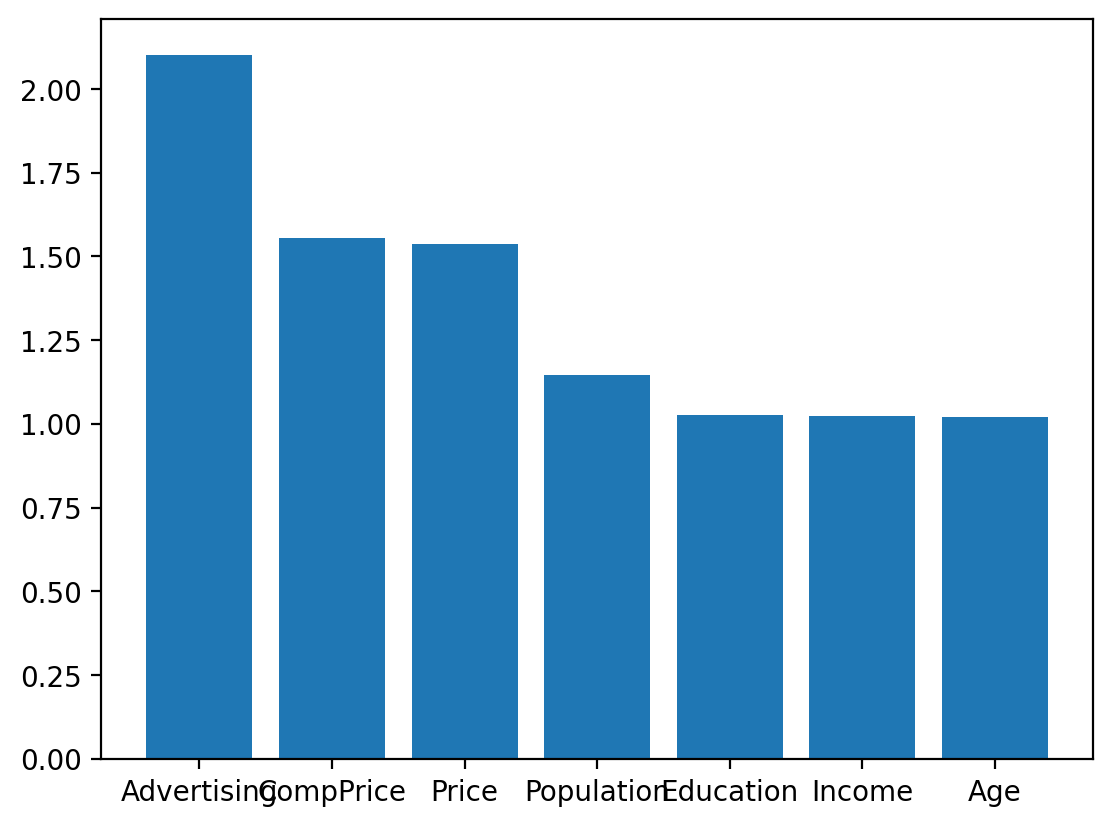

In [53]:
plt.bar(vif['feature'], vif['vif_factor'])

In [83]:
tmp = pd.DataFrame()
tmp['feature'] = x.columns
tmp['weight']= model.coef_
tmp.sort_values('weight', ascending=True, inplace=True)

In [84]:
tmp

,feature,weight
7,ShelveLoc_Bad,-1.660448
4,Price,-0.095622
5,Age,-0.048953
6,Education,-0.013829
9,ShelveLoc_Medium,-0.000000
10,Urban_No,-0.000000
11,Urban_Yes,0.000000
12,US_No,0.000000
13,US_Yes,-0.000000
3,Population,0.000632


<BarContainer object of 14 artists>

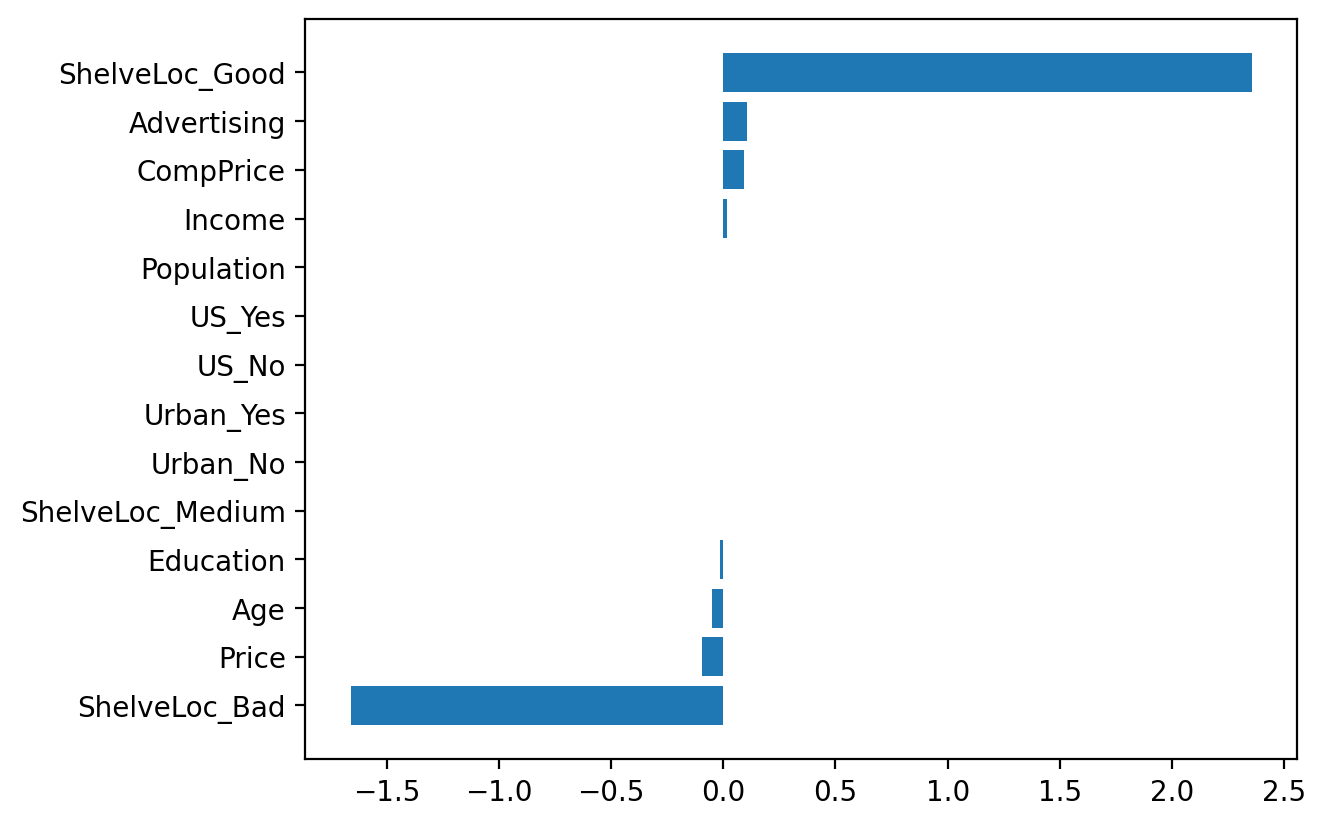

In [85]:
plt.barh(tmp['feature'], tmp['weight'])

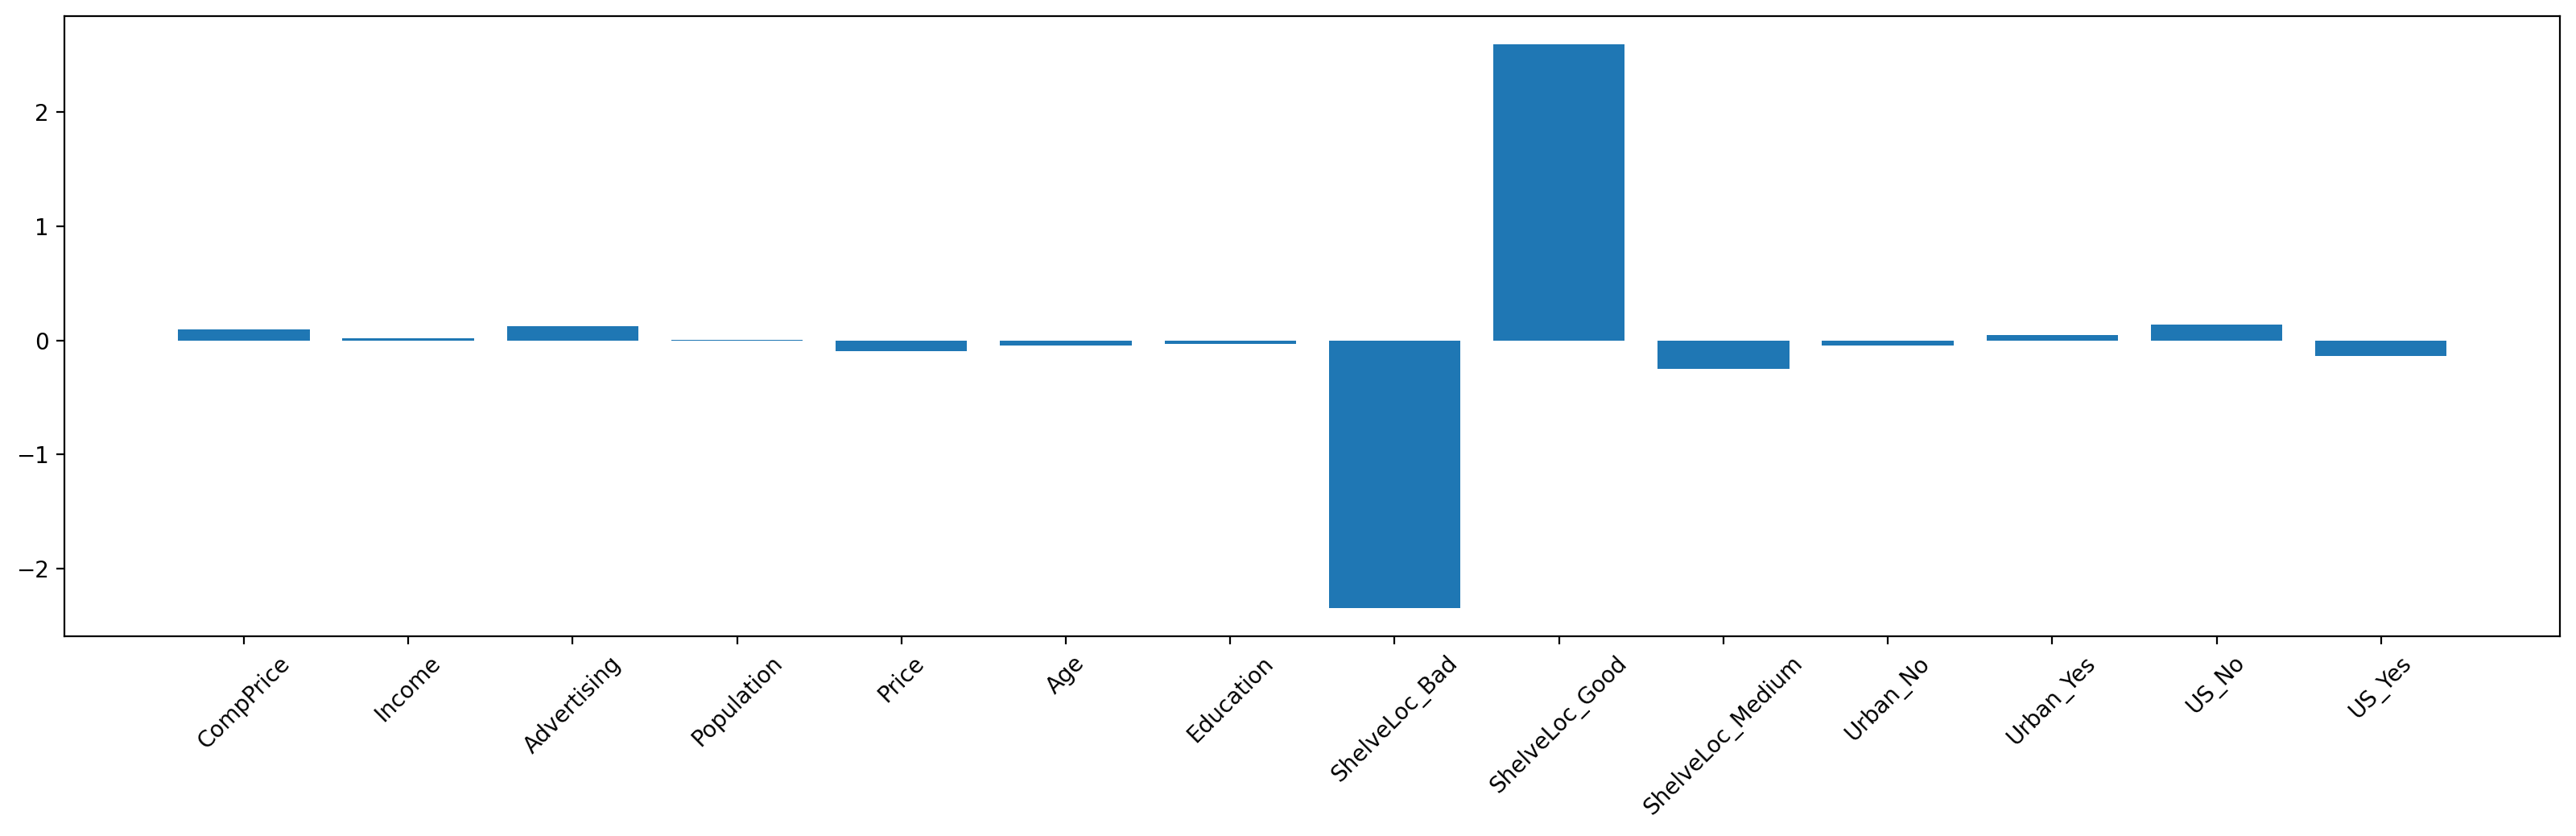

In [46]:
# 회귀계수 확인
plt.figure(figsize=(20,5))
plt.bar(x = X_train.columns.values ,height = model.coef_)
plt.xticks(rotation=45)
plt.show()

In [54]:
# 5단계: 평가하기
y_pred = model.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.853635918237043

In [69]:
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import r2_score

alpha = np.linspace(0.1, 30, 20)
model = RidgeCV(alphas=alpha, cv=5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

r2_score(y_test, y_pred)

0.8537134142333157

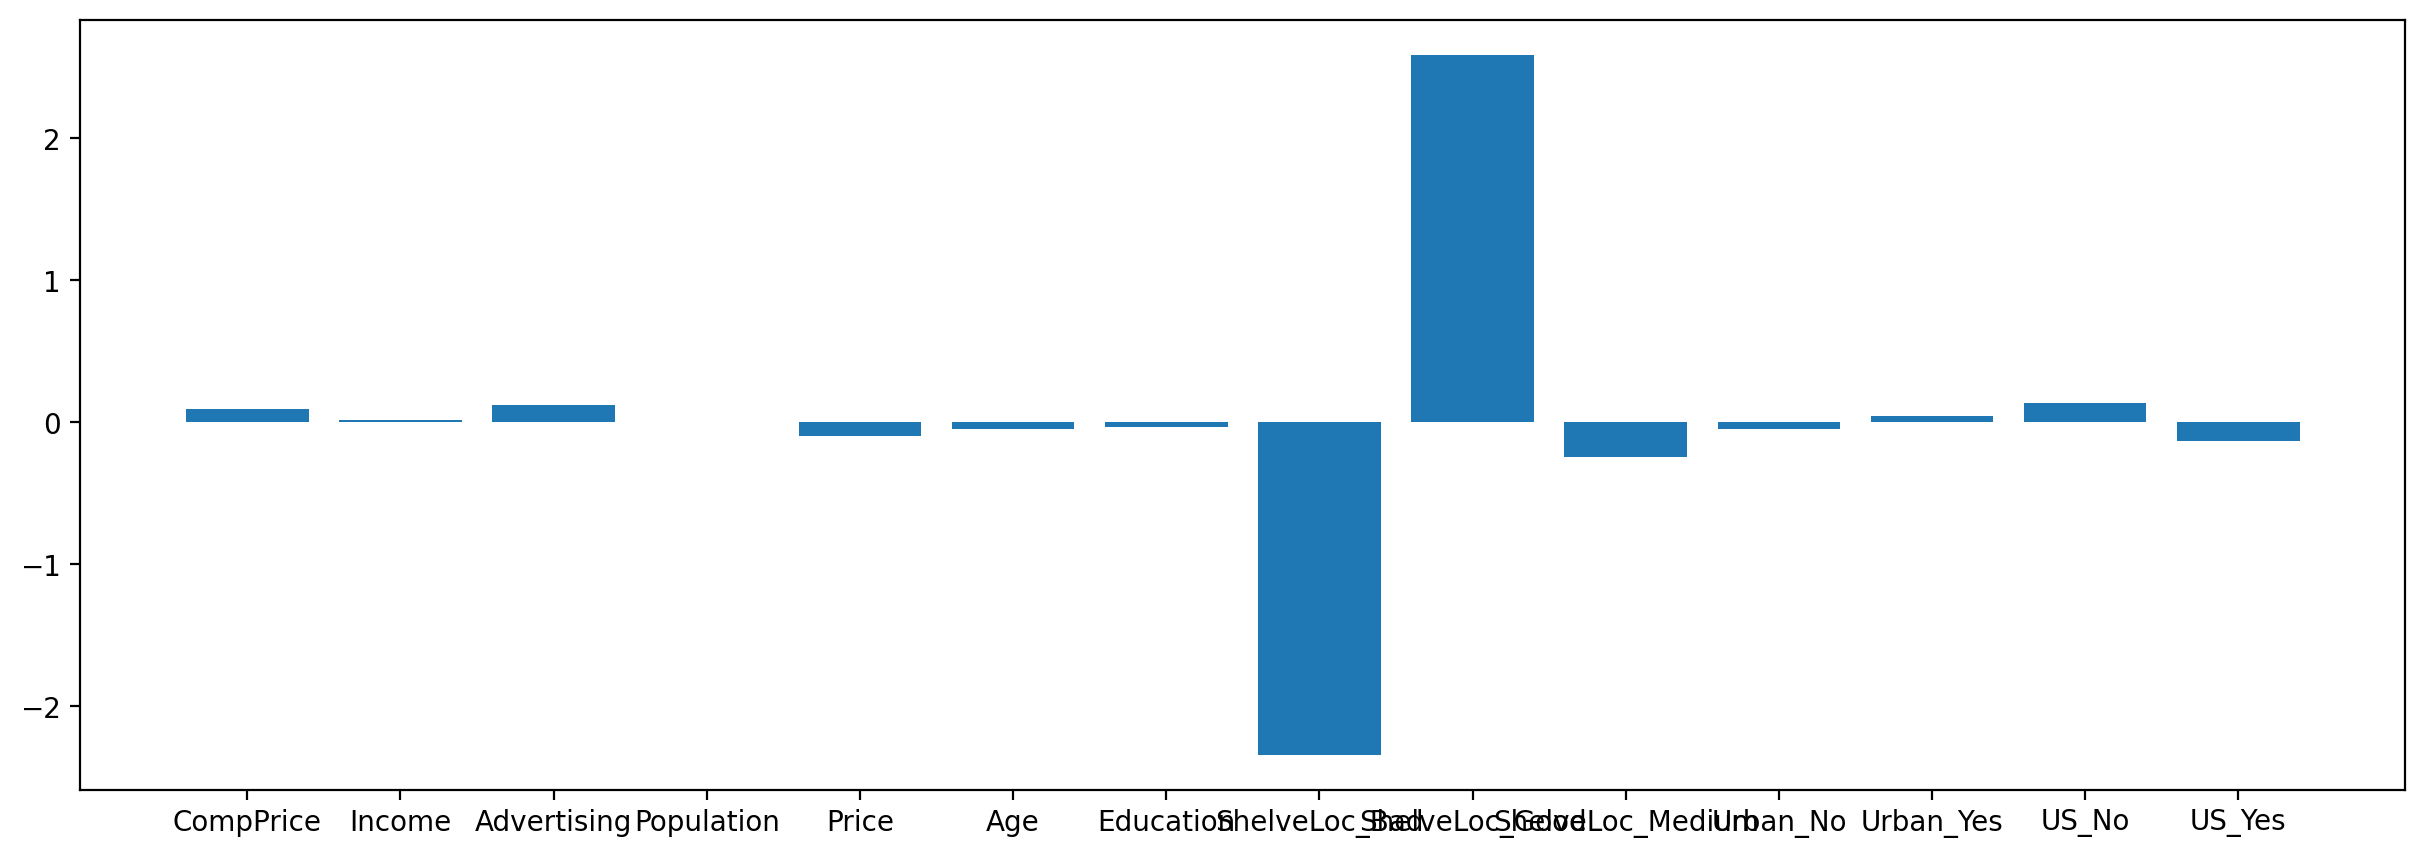

In [65]:
plt.figure(figsize=(15, 5))
plt.bar(x=X_train.columns.values, height=model.coef_)
plt.show()

In [66]:
alpha = np.linspace(0.1, 30, 20)
model = LassoCV(alphas=alpha, cv=5)
model.fit(X_train, y_train)

model.score(X_train, y_train)

0.8645354235279755

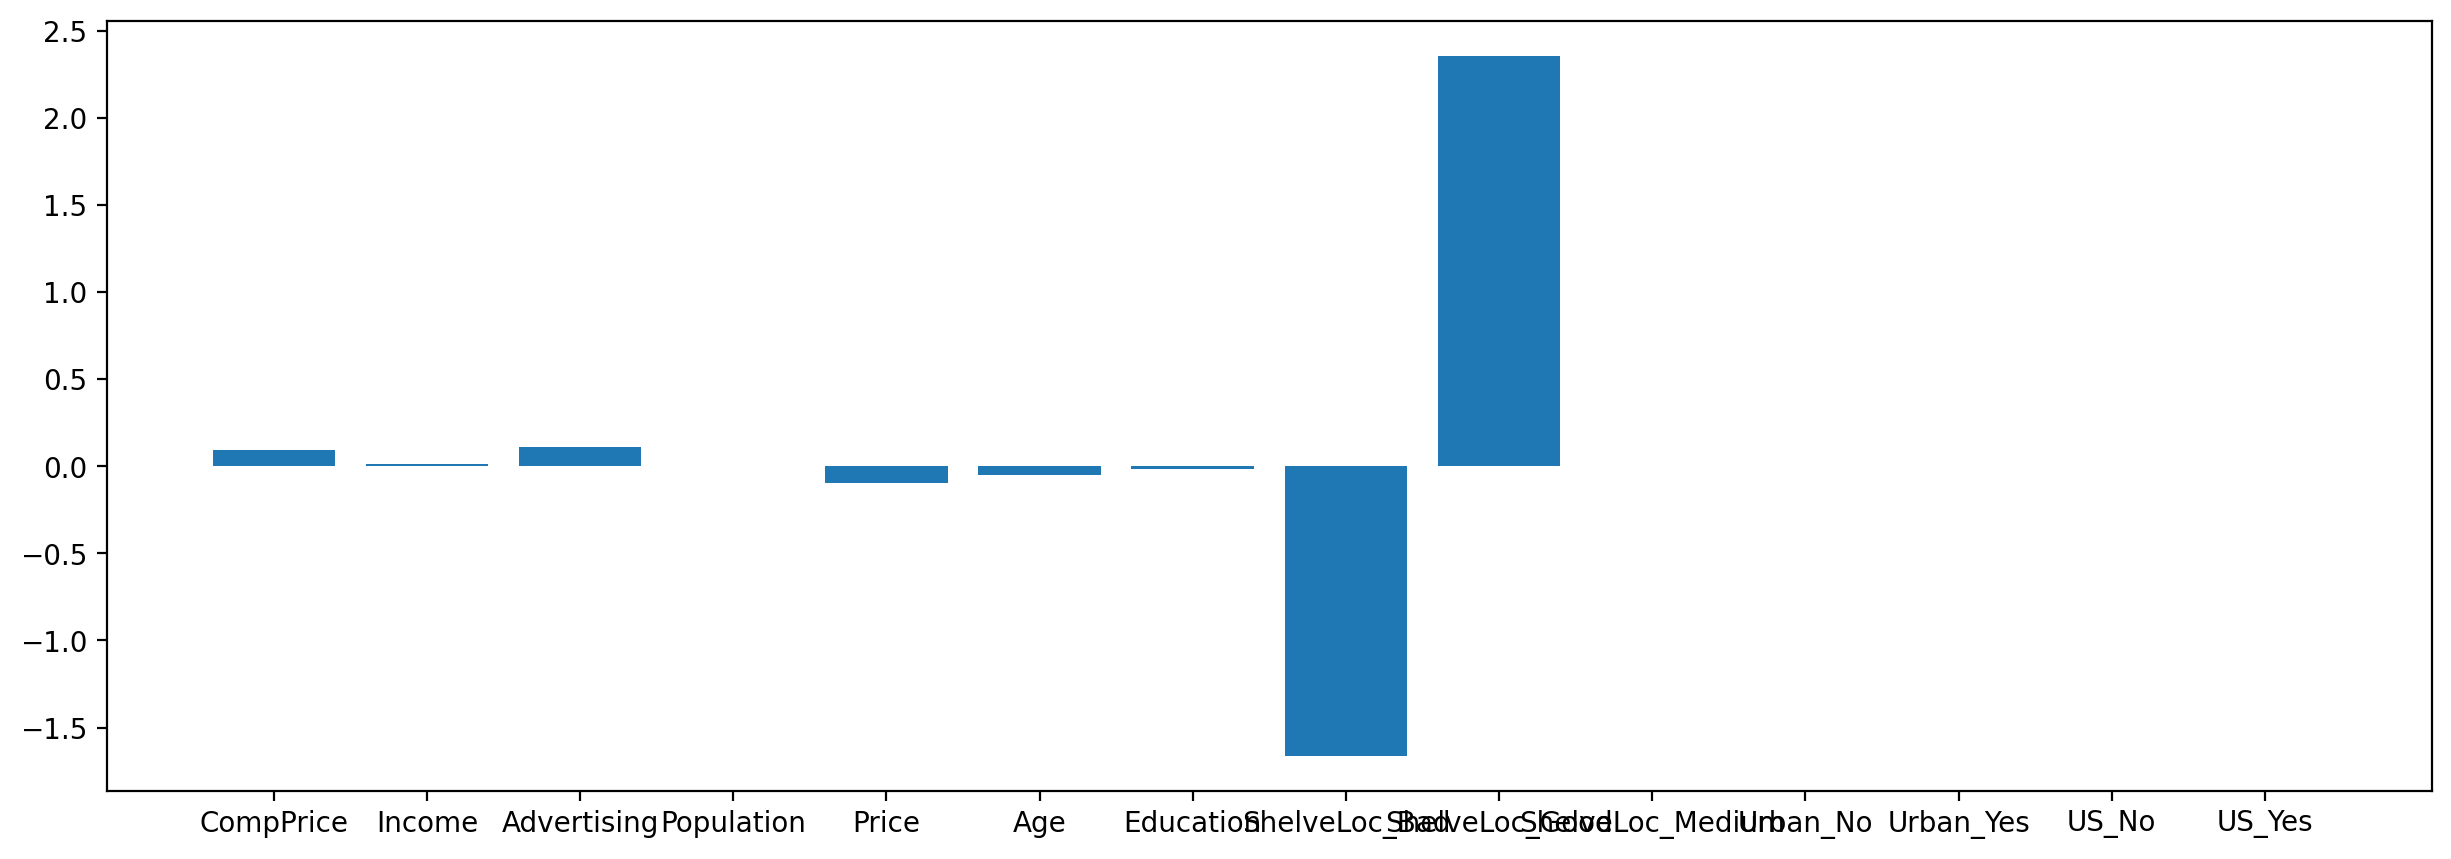

In [67]:
plt.figure(figsize=(15, 5))
plt.bar(x=X_train.columns.values, height=model.coef_)
plt.show()

In [75]:
l1 = np.linspace(0.1,1,10)
alpha = np.linspace(0.1,1,50)
model = ElasticNetCV(l1_ratio=l1, alphas=alpha, cv=5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(r2_score(y_test, y_pred))
print('l1_ratio:', model.l1_ratio_)
print('alpha:', model.alpha_)

0.8524205018462053
l1_ratio: 1.0
alpha: 0.1


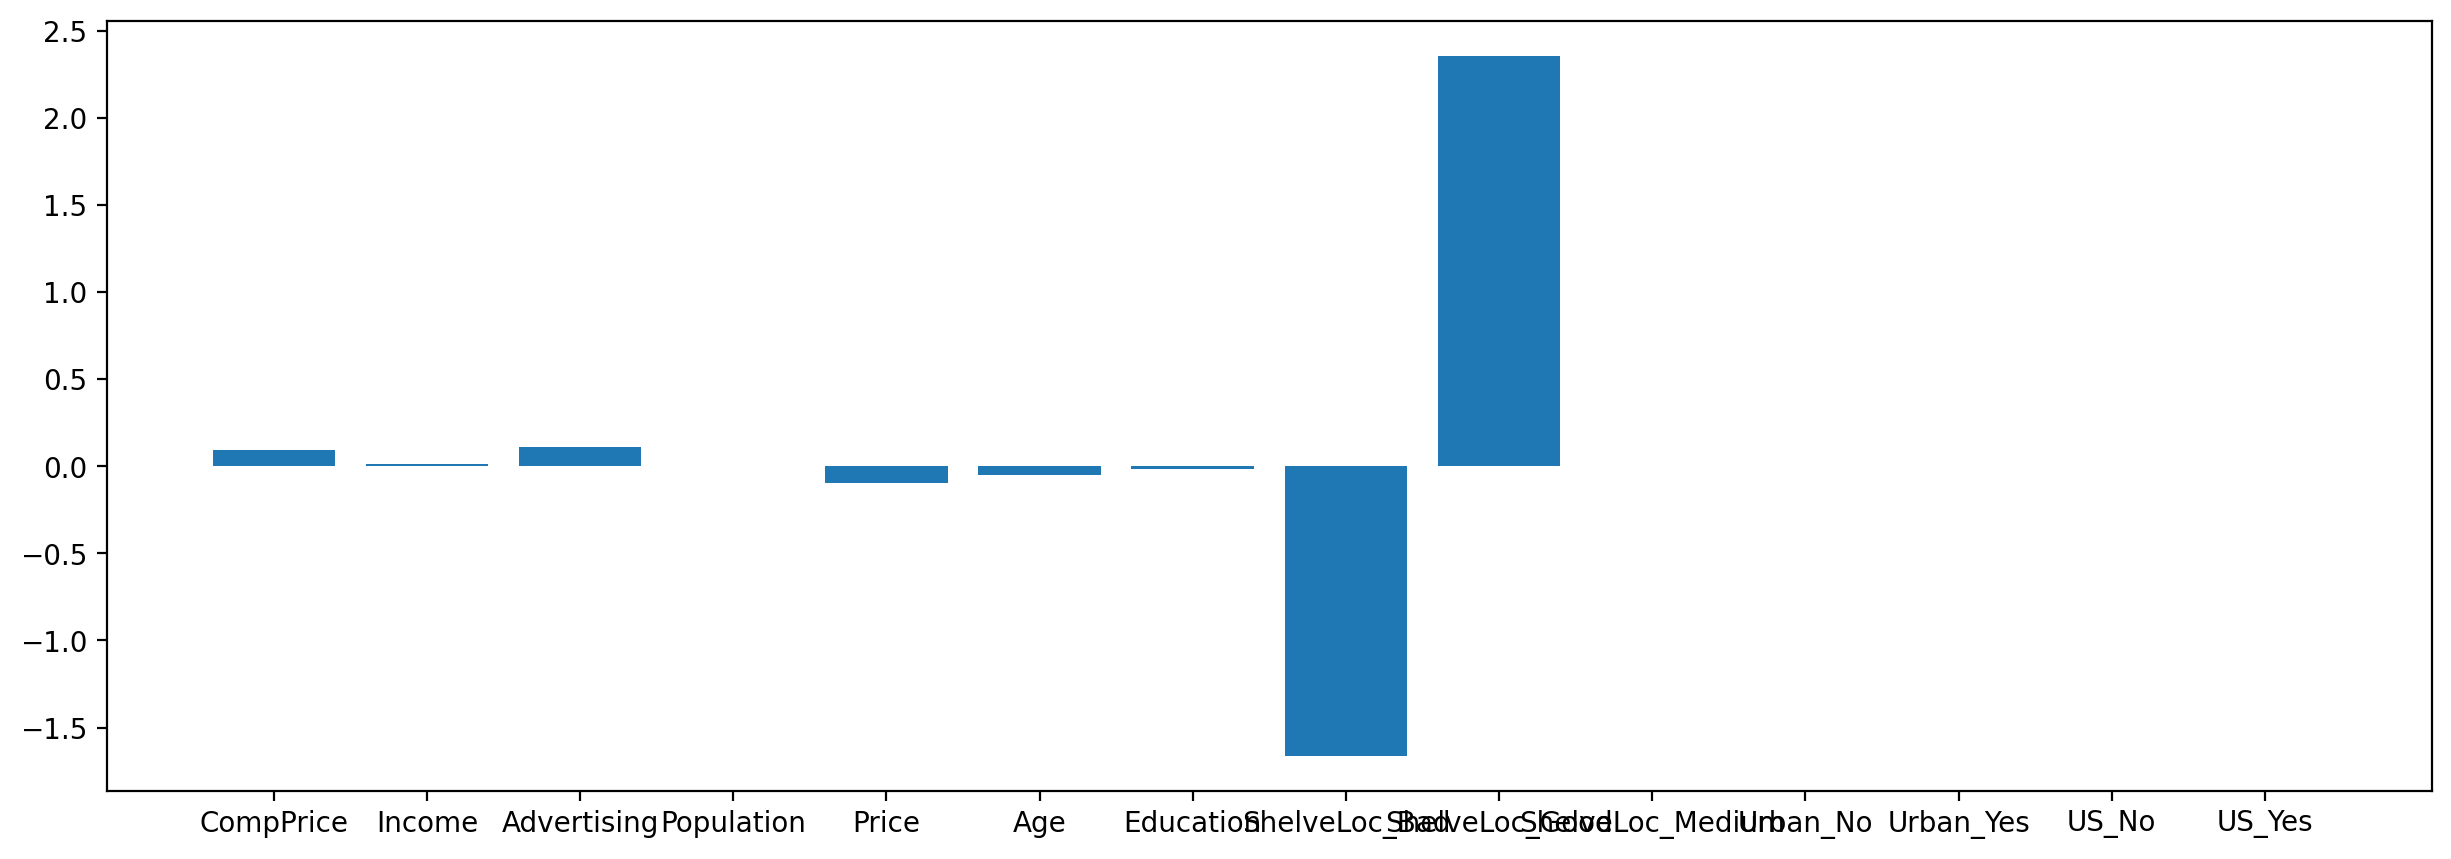

In [76]:
plt.figure(figsize=(15, 5))
plt.bar(x=X_train.columns.values, height=model.coef_)
plt.show()

In [47]:
# 4단계: 예측하기


# 5.기타

- 기타 필요한 내용이 있으면 진행합니다.

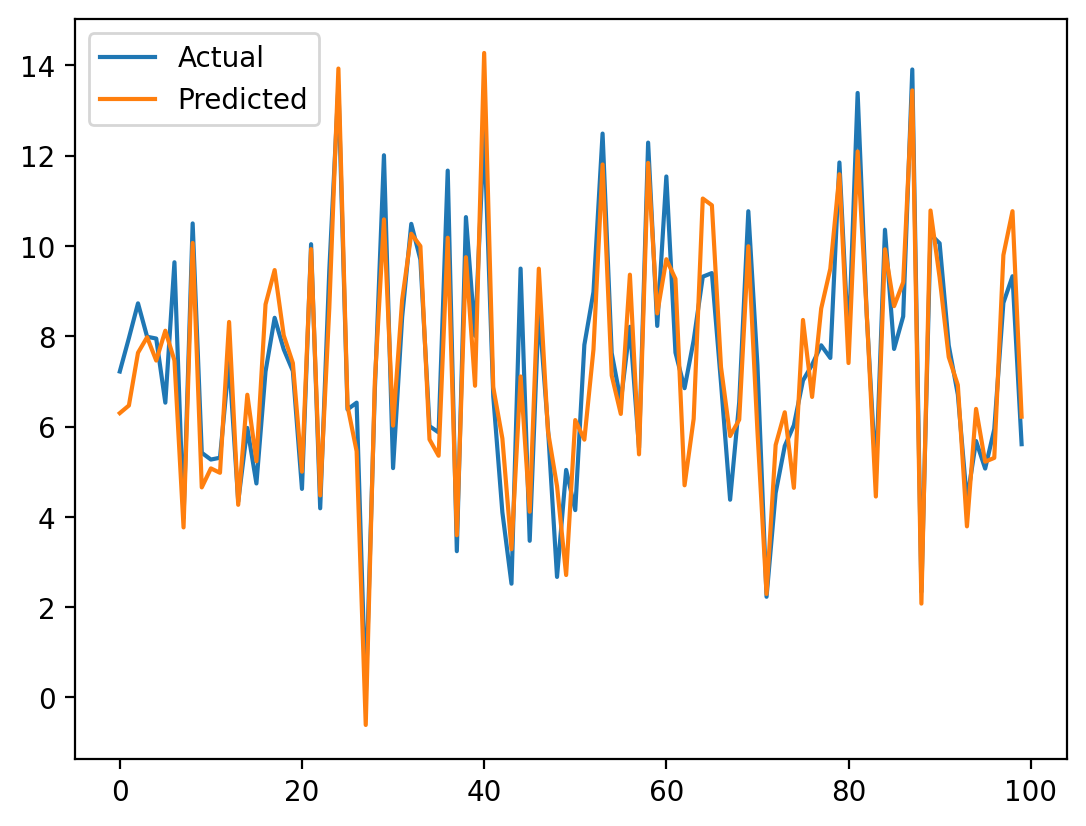

In [50]:
# 예측값, 실젯값 시각화
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()